<a href="https://colab.research.google.com/github/tirth-jarsania/Deep-Learning/blob/main/pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as jt # in locally installed
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = jt.ones(2,3)
print(x)
x = jt.zeros(2,3)
print(x)
x = jt.rand(2,3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.6544, 0.6975, 0.9843],
        [0.0358, 0.8912, 0.9611]])


In [ ]:
x = jt.empty(2,3)
print(x)
x = jt.zeros_like(x)
print(x)

tensor([[1.0901e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 1.0000e+00]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = jt.linspace(0,1,steps=5)
print(x)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [ ]:
x = x.view(5,-1)
print(x)

tensor([[0.0000],
        [0.2500],
        [0.5000],
        [0.7500],
        [1.0000]])


**Numpy Vs pyTorch**

In [ ]:
x_np = x.numpy()
print( type(x) , type(x_np) )
print( x_np )

<class 'torch.Tensor'> <class 'numpy.ndarray'>
[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [ ]:
x = jt.from_numpy(x_np)
print( type(x) , type(x_np) )
print( x )

<class 'torch.Tensor'> <class 'numpy.ndarray'>
tensor([[0.0000],
        [0.2500],
        [0.5000],
        [0.7500],
        [1.0000]])


In [ ]:
%%time
for i in range(10):
  a = np.random.randn(10000)
  b = np.random.randn(10000)
  c = a * b

CPU times: user 10.3 ms, sys: 790 µs, total: 11 ms
Wall time: 12.3 ms


In [ ]:
%%time
for i in range(10):
  a = jt.randn(10000)
  b = jt.randn(10000)
  c = a * b

CPU times: user 3.64 ms, sys: 661 µs, total: 4.3 ms
Wall time: 7.77 ms


**CUDA** **SUPPORT**

In [ ]:
print(jt.cuda.device_count())

1


In [ ]:
print(jt.cuda.device(0))

In [ ]:
print(jt.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [ ]:
st = jt.device('cuda:0')

In [ ]:
a = jt.ones(3, 2, device=st )
b = jt.ones(3, 2, device=st )
c = a + b
print( c )

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [ ]:
%%time
for i in range(10):
  a = jt.randn(10000,device=st )
  b = jt.randn(10000,device=st )
  c = a * b

CPU times: user 942 µs, sys: 626 µs, total: 1.57 ms
Wall time: 4.16 ms


**Auto Grad**

In [ ]:
x = jt.ones([2,3],requires_grad = True)
y = x + 5
r = 1 / (1 + jt.exp(-y))
a = jt.ones([2,3])
r.backward(a)
print(x.grad)

tensor([[0.0025, 0.0025, 0.0025],
        [0.0025, 0.0025, 0.0025]])


In [ ]:
%%time
learning_rate = 0.001
N = 100000
epochs = 200

w = jt.rand([N] , requires_grad=True , device = st )
b = jt.ones([1] , requires_grad=True , device = st )

print(jt.mean(w).item() , b.item())

for i in range(epochs):

  x = jt.randn([N],device = st)
  y = jt.dot(3*jt.ones([N],device = st),x) - 2

  y_hat = jt.dot(w,x) + b

  loss = jt.sum((y_hat-y)**2)

  loss.backward()

  with jt.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

print(jt.mean(w).item() , b.item())

0.500093400478363 1.0
-1089544320.0 -22907371520.0
CPU times: user 134 ms, sys: 5.92 ms, total: 140 ms
Wall time: 155 ms


**FFN using pyTorch**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error , log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
import math
import imageio
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [ ]:
import torch as jt

In [ ]:
jt.manual_seed(0)

(1000, 2) (1000,)


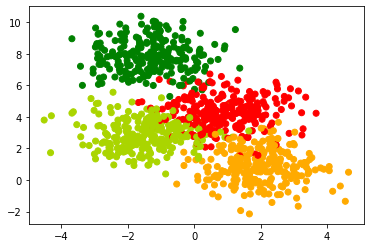

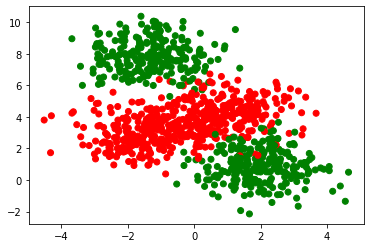

(750, 2) (250, 2)


In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
data , labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape , labels.shape)
plt.scatter(data[:,0] , data[:,1] , c=labels , cmap=my_cmap)
plt.show()
labels_org = labels
labels = np.mod( labels , 2 )
plt.scatter(data[:,0] , data[:,1] , c=labels , cmap=my_cmap)
plt.show()
X_train , X_val , Y_train , Y_val = train_test_split( data, labels_org, stratify =labels_org, random_state =0)  # split the data in the training and validation part
print( X_train.shape , X_val.shape)

**using torch tensor and autograd**

In [ ]:
X_train , X_val , Y_train , Y_val = map(jt.tensor , (X_train , X_val , Y_train , Y_val ))

In [ ]:
print( X_train.shape , X_val.shape)

torch.Size([750, 2]) torch.Size([250, 2])


In [ ]:
def model(x):
  a1 = jt.matmul( x , W1 ) + B1
  h1 = a1.sigmoid()
  a2 = jt.matmul( h1 , W2 ) + B2
  h2 = a2.exp() / (a2.exp().sum(-1).unsqueeze(-1))
  return h2

In [ ]:
def loss_fn( y_hat , y ):
  return -(y_hat[range(y.shape[0]),y].log()).mean()

In [ ]:
 a = jt.tensor([[1, 2], [3, 4], [5, 6]])
 print(a.sum(0).shape)
 print(a.sum(0).unsqueeze(1).shape)

torch.Size([2])
torch.Size([2, 1])


In [ ]:
def accuracy( y_hat , y ):
  pred = jt.argmax( y_hat , dim = 1 )
  return ( pred == y ).float().mean()

In [ ]:
W1 = jt.randn(2,2) / math.sqrt(2)
W1.requires_grad_()
B1 = jt.zeros(2, requires_grad=True )

W2 = jt.randn(2,4) / math.sqrt(2)
W2.requires_grad_()
B2 = jt.zeros(4, requires_grad=True )

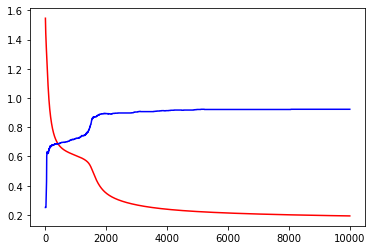

Before loss :  1.5456440448760986
After loss :  0.19288595020771027


In [ ]:
learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for e in range( epochs ):
  y_hat = model( X_train )
  loss = loss_fn( y_hat , Y_train )
  loss.backward()
  loss_arr.append( loss.item() )
  acc_arr.append( accuracy( y_hat , Y_train) )

  with jt.no_grad():
    W1 -= W1.grad * learning_rate
    B1 -= B1.grad * learning_rate
    W2 -= W2.grad * learning_rate
    B2 -= B2.grad * learning_rate
    W1.grad.zero_()
    B1.grad.zero_()
    W2.grad.zero_()
    B2.grad.zero_()

plt.plot( loss_arr , '-r' )
plt.plot( acc_arr , '-b' )
plt.show()

print("Before loss : " , loss_arr[0] )
print("After loss : " , loss_arr[-1] )

In [ ]:
import torch.nn.functional as F

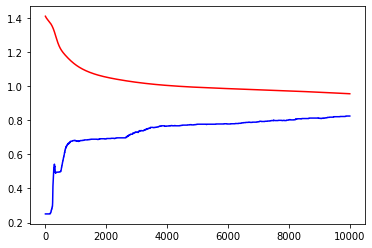

Before loss :  1.4111980199813843
After loss :  0.9561843872070312
Before loss :  tensor(0.2507)
After loss :  tensor(0.8253)


In [ ]:
jt.manual_seed(0)
W1 = jt.randn(2,2) / math.sqrt(2)
W1.requires_grad_()
B1 = jt.zeros(2, requires_grad=True )

W2 = jt.randn(2,4) / math.sqrt(2)
W2.requires_grad_()
B2 = jt.zeros(4, requires_grad=True )

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for e in range( epochs ):
  y_hat = model( X_train )
  loss = F.cross_entropy( y_hat , Y_train )
  loss.backward()
  loss_arr.append( loss.item() )
  acc_arr.append( accuracy( y_hat , Y_train) )

  with jt.no_grad():
    W1 -= W1.grad * learning_rate
    B1 -= B1.grad * learning_rate
    W2 -= W2.grad * learning_rate
    B2 -= B2.grad * learning_rate
    W1.grad.zero_()
    B1.grad.zero_()
    W2.grad.zero_()
    B2.grad.zero_()

plt.plot( loss_arr , '-r' )
plt.plot( acc_arr , '-b' )
plt.show()

print("Before loss : " , loss_arr[0] )
print("After loss : " , loss_arr[-1] )


print("Before loss : " , acc_arr[0] )
print("After loss : " , acc_arr[-1] )

In [ ]:
import torch.nn as nn

In [ ]:
class FirstDLNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    jt.manual_seed(0)
    self.W1 = nn.Parameter(jt.randn(2,2) / math.sqrt(2))
    self.B1 = nn.Parameter(jt.zeros(2))
    self.W2 = nn.Parameter(jt.randn(2,4) / math.sqrt(2))
    self.B2 = nn.Parameter(jt.zeros(4))

  def forward(self, X):
    a1 = jt.matmul( X , self.W1 ) + self.B1
    h1 = a1.sigmoid()
    a2 = jt.matmul( h1 , self.W2 ) + self.B2
    h2 = a2.exp() / (a2.exp().sum(-1).unsqueeze(-1))
    return h2

In [ ]:
def fit(epochs = 10000 , learning_rate = 1 ):
  loss_arr = []
  acc_arr = []

  for e in range( epochs ):
    y_hat = fn( X_train )
    loss = F.cross_entropy( y_hat , Y_train )
    loss.backward()
    loss_arr.append( loss.item() )
    acc_arr.append( accuracy( y_hat , Y_train) )

    with jt.no_grad():
      for param in fn.parameters():
        param -= param.grad * learning_rate
        param.grad.zero_()

  plt.plot( loss_arr , '-r' )
  plt.plot( acc_arr , '-b' )
  plt.show()

  print("Before loss : " , loss_arr[0] )
  print("After loss : " , loss_arr[-1] )


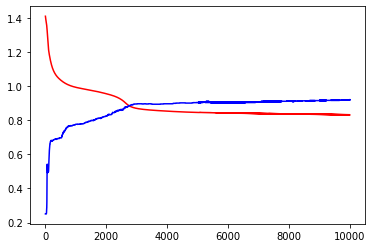

Before loss :  1.4111980199813843
After loss :  0.8324941992759705


In [ ]:
fn = FirstDLNetwork()
fit()

Using NN.linear and NN.optim

In [ ]:
class FirstDLNetwork_1(nn.Module):

  def __init__(self):
    super().__init__()
    jt.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp() / (a2.exp().sum(-1).unsqueeze(-1))
    return h2

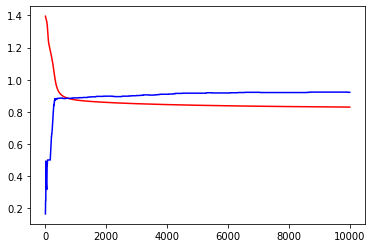

Before loss :  1.395160436630249
After loss :  0.8293508887290955


In [ ]:
fn = FirstDLNetwork_1()
fit()

In [ ]:
from torch import optim

In [ ]:
def fit_1(epochs = 10000 , learning_rate = 1 ):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters() , lr=learning_rate )

  for e in range( epochs ):
    y_hat = fn( X_train )
    loss = F.cross_entropy( y_hat , Y_train )
    loss.backward()
    loss_arr.append( loss.item() )
    acc_arr.append( accuracy( y_hat , Y_train) )
    opt.step()
    opt.zero_grad()

  plt.plot( loss_arr , '-r' )
  plt.plot( acc_arr , '-b' )
  plt.show()

  print("Before loss : " , loss_arr[0] )
  print("After loss : " , loss_arr[-1] )

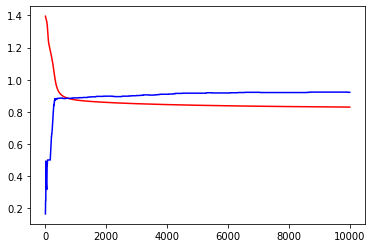

Before loss :  1.395160436630249
After loss :  0.8293508887290955


In [ ]:
fn = FirstDLNetwork_1()
fit_1()

In [ ]:
class FirstDLNetwork_2(nn.Module):

  def __init__(self):
    super().__init__()
    jt.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,128),
        nn.Sigmoid(),
        nn.Linear(128,4),
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

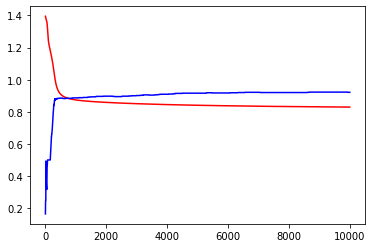

Before loss :  1.395160436630249
After loss :  0.829351007938385


In [ ]:
fn = FirstDLNetwork_2()
fit_1()

In [ ]:
def fit_2(x , y , fn ,  opt , loss_fn , epochs = 1000  ):

  for e in range( epochs ):
    loss = loss_fn( fn.forward(x) , y )
    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item()

In [ ]:
fn = FirstDLNetwork_2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters() , lr=0.2 )
fit_2( X_train , Y_train , fn , opt , loss_fn)

0.8586323857307434

easy to select hardware accelerator

In [ ]:
device = jt.device("cpu")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstDLNetwork_2()
fn.to(device)
tic = time.time()
print('Final Loss', fit_2(X_train , Y_train , fn , opt , loss_fn))
toc = time.time()
print('Time taken' , toc-tic )

Final Loss 1.3985880613327026
Time taken 1.4262192249298096
